In [1]:
import numpy as np

In [20]:
# Create synthetic dataset of points on a 2-D line with 10 bins
np.random.seed(42)  # For reproducibility

# Define line parameters (slope and intercept)
slope = 2
intercept = 1

# Create 10 bins along the line
n_bins = 10
points_per_bin = 100
noise_level = 0.5

# Generate x values for each bin (only positive x values)
x_bins = np.linspace(0, 5, n_bins)
bin_width = (5 - 0) / n_bins

X_list = []
bin_labels = []

for i, x_center in enumerate(x_bins):
    # Generate points within this bin
    x_bin = np.random.uniform(x_center - bin_width/2, x_center + bin_width/2, points_per_bin)
    
    # Generate corresponding y values on the line with noise
    y_bin = slope * x_bin + intercept + np.random.normal(0, noise_level, points_per_bin)
    
    # Stack x and y coordinates
    bin_points = np.column_stack([x_bin, y_bin])
    X_list.append(bin_points)
    
    # Track which bin each point belongs to
    bin_labels.extend([i] * points_per_bin)

# Combine all points
X = np.vstack(X_list)
bin_labels = np.array(bin_labels)

print(f"Dataset shape: {X.shape}")
print(f"Number of bins: {n_bins}")
print(f"Points per bin: {points_per_bin}")
print(f"First 5 points:\n{X[:5]}")
print(f"Bin labels for first 5 points: {bin_labels[:5]}")

# Train logistic regression classifier to predict bin labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, bin_labels, test_size=0.2, random_state=42, stratify=bin_labels)

# Create and train the logistic regression classifier
logistic_model = LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Results:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


Dataset shape: (1000, 2)
Number of bins: 10
Points per bin: 100
First 5 points:
[[-0.06272994  0.91806365]
 [ 0.22535715  1.30121063]
 [ 0.11599697  1.27787433]
 [ 0.04932924  0.10487403]
 [-0.17199068  0.5461827 ]]
Bin labels for first 5 points: [0 0 0 0 0]

Logistic Regression Results:
Training set size: 800
Test set size: 200
Accuracy: 0.6250

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.70      0.70      0.70        20
           2       0.47      0.45      0.46        20
           3       0.44      0.40      0.42        20
           4       0.30      0.45      0.36        20
           5       0.31      0.25      0.28        20
           6       0.80      0.40      0.53        20
           7       0.77      0.85      0.81        20
           8       0.84      0.80      0.82        20
           9       0.87      1.00      0.93        20

    accuracy                    

/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


/tmp/ipykernel_175056/3325213208.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_bins))


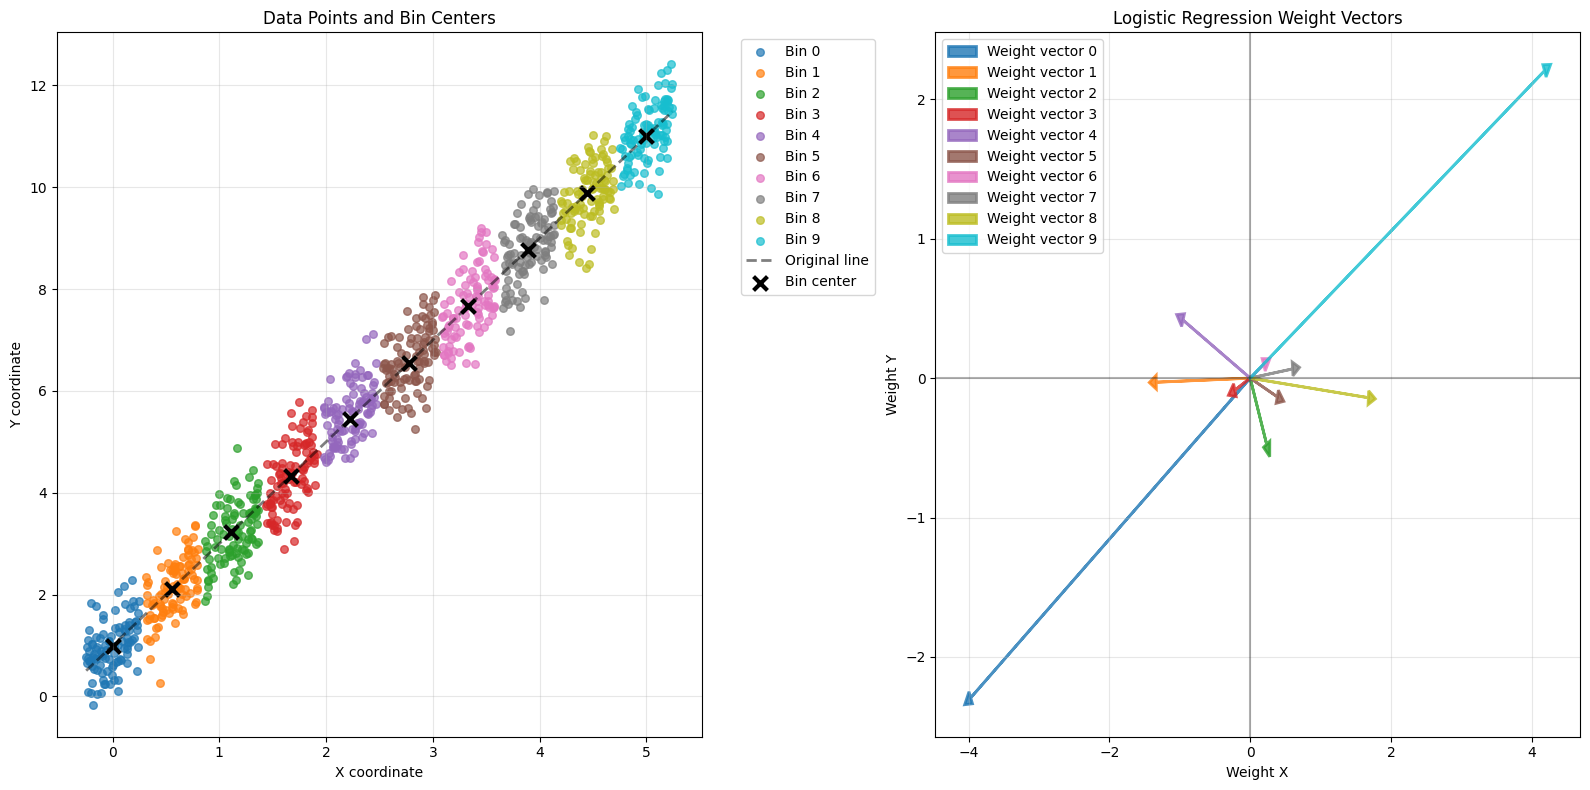

Dataset shape: (1000, 2)
Number of bins: 10
Points per bin: 100
X range: [-0.25, 5.24]
Y range: [-0.16, 12.41]

Bin centers (2D coordinates):
  Bin 0: (0.00, 1.00)
  Bin 1: (0.56, 2.11)
  Bin 2: (1.11, 3.22)
  Bin 3: (1.67, 4.33)
  Bin 4: (2.22, 5.44)
  Bin 5: (2.78, 6.56)
  Bin 6: (3.33, 7.67)
  Bin 7: (3.89, 8.78)
  Bin 8: (4.44, 9.89)
  Bin 9: (5.00, 11.00)

Logistic regression weights (no bias):
  Class 0: w = [-3.9710, -2.2928]
  Class 1: w = [-1.3345, -0.0294]
  Class 2: w = [0.2339, -0.4744]
  Class 3: w = [-0.2170, -0.0864]
  Class 4: w = [-0.9538, 0.4159]
  Class 5: w = [0.3847, -0.1339]
  Class 6: w = [0.1916, 0.0953]
  Class 7: w = [0.6030, 0.0659]
  Class 8: w = [1.6798, -0.1406]
  Class 9: w = [4.1823, 2.2040]


In [21]:
# Plot the x and y coordinates on the plane, colored by bin
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Create a colormap for the bins
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_bins))

# LEFT SUBPLOT: Plot each bin with a different color
for i in range(n_bins):
    bin_mask = bin_labels == i
    bin_points = X[bin_mask]
    ax1.scatter(bin_points[:, 0], bin_points[:, 1], 
              c=[colors[i]], label=f'Bin {i}', alpha=0.7, s=30)

# Add the original line for reference
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_line = slope * x_line + intercept
ax1.plot(x_line, y_line, 'k--', alpha=0.5, linewidth=2, label='Original line')

# Calculate and plot bin centers as 2D points
bin_centers_2d = []
for i, x_center in enumerate(x_bins):
    # Calculate the y-coordinate of the bin center on the original line
    y_center = slope * x_center + intercept
    bin_centers_2d.append([x_center, y_center])
    
    # Plot bin center as a larger point
    ax1.scatter(x_center, y_center, c='black', s=100, marker='x', 
              linewidth=3, label='Bin center' if i == 0 else "")

bin_centers_2d = np.array(bin_centers_2d)

ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')
ax1.set_title('Data Points and Bin Centers')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# RIGHT SUBPLOT: Plot weight vectors
weights = logistic_model.coef_  # Shape: (n_classes, n_features)

# Plot weight vectors from origin
for i in range(n_bins):
    if weights.shape[0] > 1:  # Multi-class case
        w = weights[i]
    else:  # Binary case (shouldn't happen here but just in case)
        w = weights[0]
    
    # Plot weight vector as arrow from origin
    ax2.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, 
             fc=colors[i], ec=colors[i], alpha=0.8, linewidth=2,
             label=f'Weight vector {i}')

ax2.set_xlabel('Weight X')
ax2.set_ylabel('Weight Y')
ax2.set_title('Logistic Regression Weight Vectors')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Print basic statistics and model information
print(f"Dataset shape: {X.shape}")
print(f"Number of bins: {n_bins}")
print(f"Points per bin: {points_per_bin}")
print(f"X range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Y range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")
print(f"\nBin centers (2D coordinates):")
for i, center in enumerate(bin_centers_2d):
    print(f"  Bin {i}: ({center[0]:.2f}, {center[1]:.2f})")
print(f"\nLogistic regression weights (no bias):")
for i in range(n_bins):
    if weights.shape[0] > 1:
        w = weights[i]
        print(f"  Class {i}: w = [{w[0]:.4f}, {w[1]:.4f}]")
